# Algerian Forest Fires

## Goal of Project

#### 1. Create the best linear regression model to predict Fire Weather Index (FWI) from selected features
#### 2. Create a logistic regression model that uses the selected features and the predicted FWI to predict the probability of a fire. 
#### 3. Export the models and scalers to create a user interface for future predictions and host it on AWS

# Exploratory Data Analysis and Feature Engineering

## Algerian Forest Fires Dataset

### Dataset Overview

This dataset contains **244 instances** collected from two regions in Algeria:

- **Bejaia** (northeast Algeria)  
- **Sidi Bel-Abbes** (northwest Algeria)  

Each region contributes **122 instances**.

The data was recorded during the period from **June 2012 to September 2012**.

### Dataset Structure

- **11 input attributes**
- **1 output attribute (class label)**

### Class Distribution

- **Fire**: 138 instances  
- **No Fire**: 106 instances


## Attribute Information

The dataset includes 12 attributes, covering weather conditions, fire weather indices, and class labels. Below is a description of each:

1. **Date**:  
   Format: `DD/MM/YYYY`. Represents the day, month (June to September), and year (2012) of the recorded observation.

#### Weather Observations

2. **Temp** *(°C)*:  
   Temperature at noon, typically the daily maximum. Ranges from **22°C to 42°C**.

3. **RH** *(%)*:  
   Relative Humidity, ranging from **21% to 90%**.

4. **Ws** *(km/h)*:  
   Wind speed, ranging from **6 km/h to 29 km/h**.

5. **Rain** *(mm)*:  
   Total daily rainfall, ranging from **0 mm to 16.8 mm**.

#### Fire Weather Index (FWI) Components

6. **FFMC (Fine Fuel Moisture Code)**:  
   Indicates the moisture content of litter and fine fuels. Values range from **28.6 to 92.5**; lower values indicate wetter fuels.

7. **DMC (Duff Moisture Code)**:  
   Represents the moisture content in loosely compacted organic layers. Ranges from **1.1 to 65.9**.

8. **DC (Drought Code)**:  
   Measures long-term drought effects in deep, compact organic layers. Ranges from **7.0 to 220.4**.

9. **ISI (Initial Spread Index)**:  
   Combines wind and FFMC to estimate potential fire spread rate. Ranges from **0.0 to 18.5**.

10. **BUI (Build-Up Index)**:  
    Combines DMC and DC to reflect fuel availability. Ranges from **1.1 to 68.0**.

11. **FWI (Fire Weather Index)**:  
    Overall fire danger rating that integrates ISI and BUI. Ranges from **0.0 to 31.1**.

#### Output Label

12. **Classes**:  
    Binary class label:
    - `0`: Fire  
    - `1`: No Fire


## Loading Data

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read the dataset
# Change path as needed
dataset=pd.read_csv('~/Desktop/Data Science/GitHub/Machine-Learning-Projects-End-to-End/Algerian-Forest-Fire-Predictor/dataset/Algerian_forest_fires_dataset_UPDATE.csv' ,header=1) 
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
# Check the data types of the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

The dataset is converted into two sets based on region which we can use to make a new column based on the region:

Index 0-122 : "Bejaia Region Dataset" = 0

Index 122-244 : "Sidi-Bel Abbes Region Dataset" = 1


In [5]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset
df[['Region']]=df[['Region']].astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [8]:
# Check for missing values
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [9]:
## Removing the null values
df=df.dropna().reset_index(drop=True)

In [10]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [11]:
# Check the 122nd row to see if it contains actual data
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [12]:
# Remove the 122nd row
df=df.drop(122).reset_index(drop=True)
# Check the 122nd row to see if it contains actual data
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [13]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [14]:
# Fix spaces in columns names
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

#### Changes the required columns as integer data type

In [15]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [16]:
# Convert months to string values
df['month'] = df['month'].astype(int).map({
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September'
})

#### Changing the other columns to float data datatype


In [17]:
# Find the columns that are object data type
objects=[features for features in df.columns if df[features].dtypes=='O']
# Remove the first and last columns to avoid converting the date and region columns to float
objects = objects[1:-1]
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [18]:
# Convert the object data types to float 
for i in objects:
    df[i]=df[i].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    object 
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(6), object(2)
memory usage: 28.6+ KB


In [19]:
# Consolidate the not fire and fire classes
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

In [20]:
# Get summary statistics for the dataset
df.describe()

,day,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


###  Removing columns that are not needed for EDA

In [21]:
# Drop day, month and year as they don't affect the fires
df_copy=df.drop(['day','month','year'],axis=1)

In [22]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [23]:
# Consolidate categories in classes
df_copy['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [24]:
# Encoding of the categories in classes with 0 and 1
# 0 = not fire, 1 = fire 
df[['Classes']]=df[['Classes']].astype(str)
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [25]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [26]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [27]:
# Save the cleaned dataset
df_copy.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

## Exploratory Data Analysis

#### Plot density plot for all features to understand the distribution and check for outliers

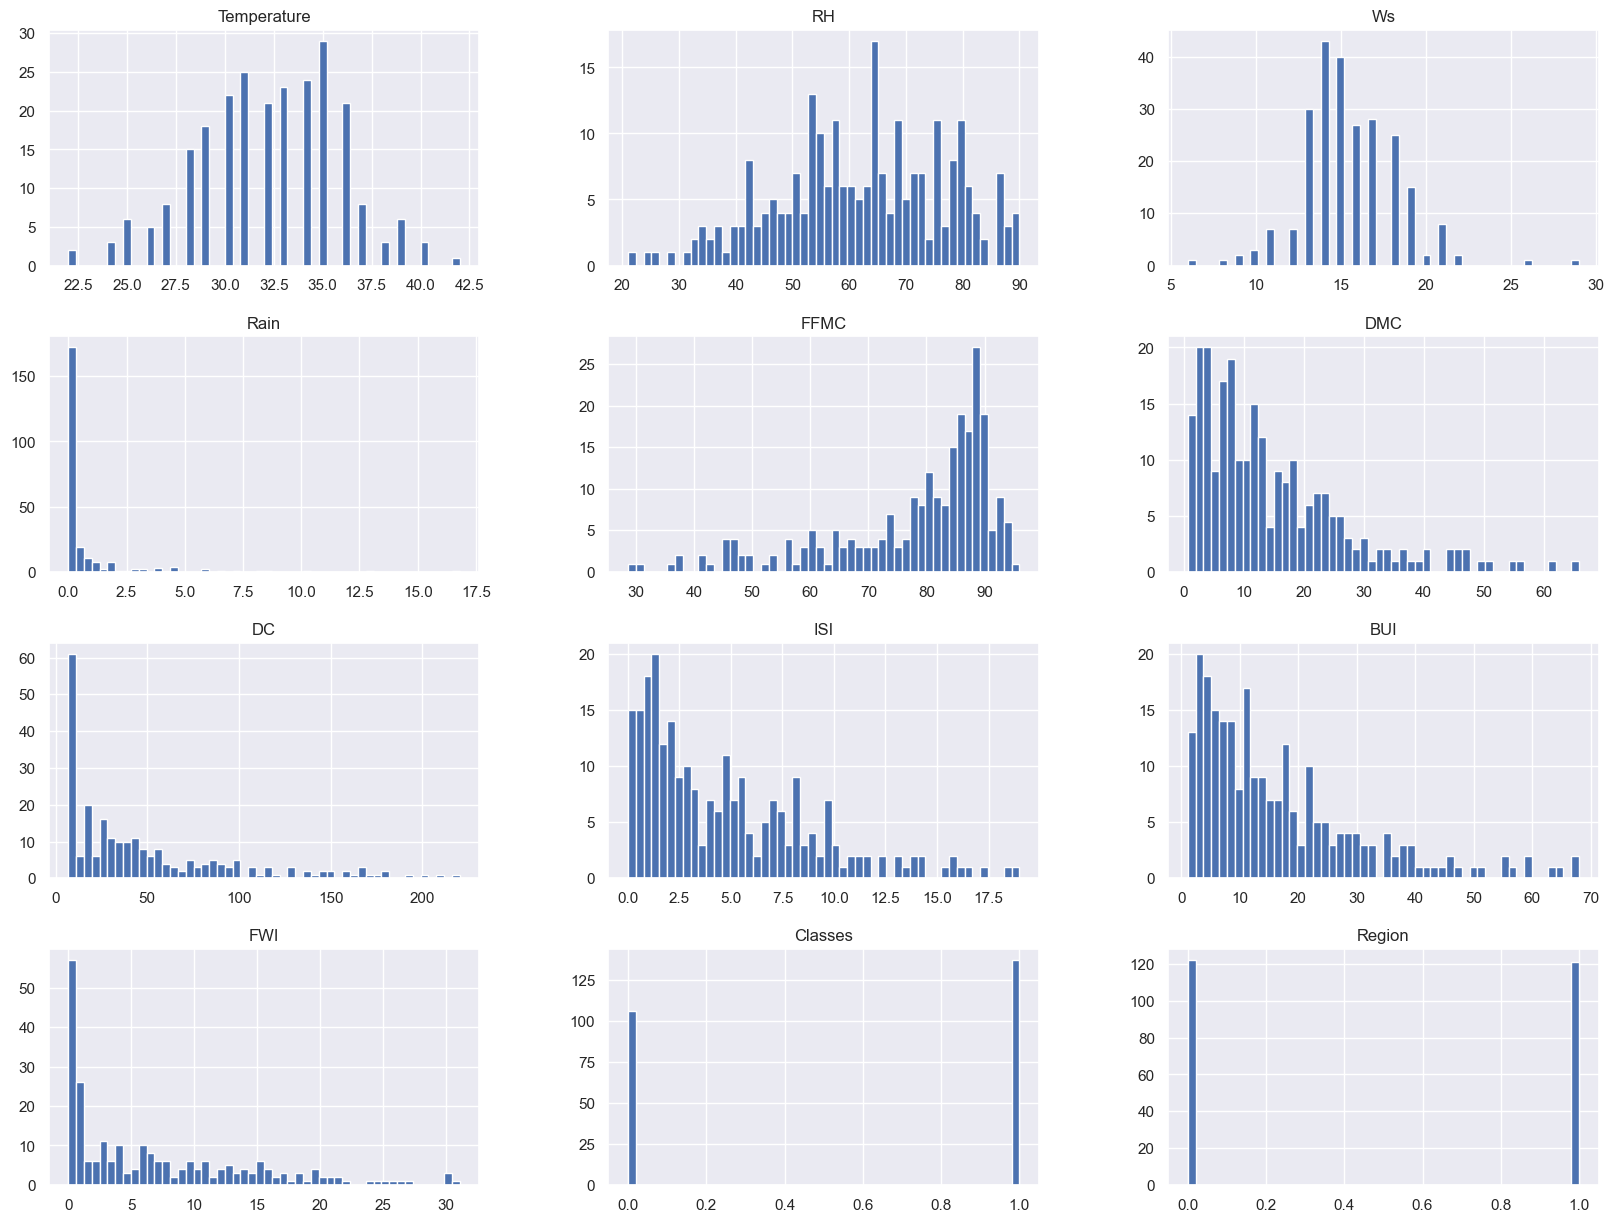

In [31]:
sns.set_theme()
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

#### Pie Chart

In [32]:
## Percentage for Pie Chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100

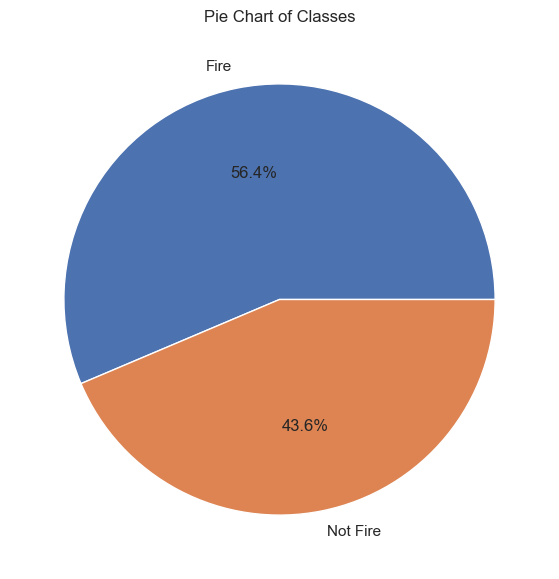

In [33]:
# Plotting piechart
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

### Correlation

- The Pearson correlation coefficient, often denoted as r, is a statistical measure that quantifies the strength and direction of a linear relationship between two continuous variables
    - A value of +1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship. 


In [34]:
# Calculate the pearson correlation coefficient
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

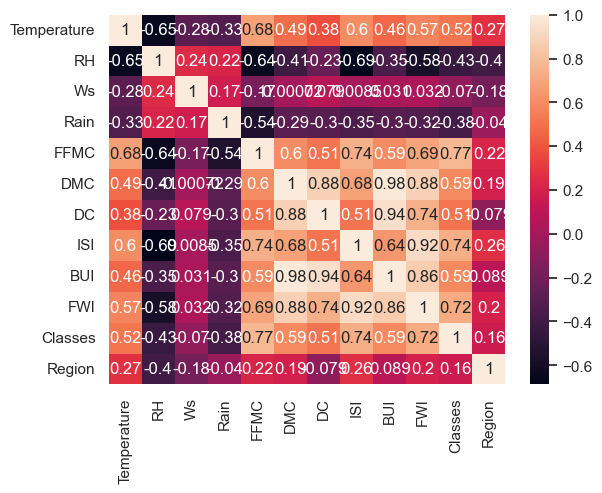

In [35]:
# Plot the correlation matrix
sns.heatmap(df_copy.corr(),annot=True)

<Axes: ylabel='BUI'>

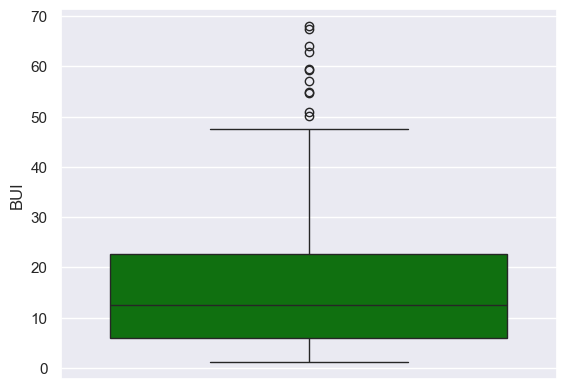

In [36]:
## Create box plots any features that have outliers
sns.boxplot(df_copy['BUI'],color='green')

### Using the original dataframe to do a monthly fire analysis

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

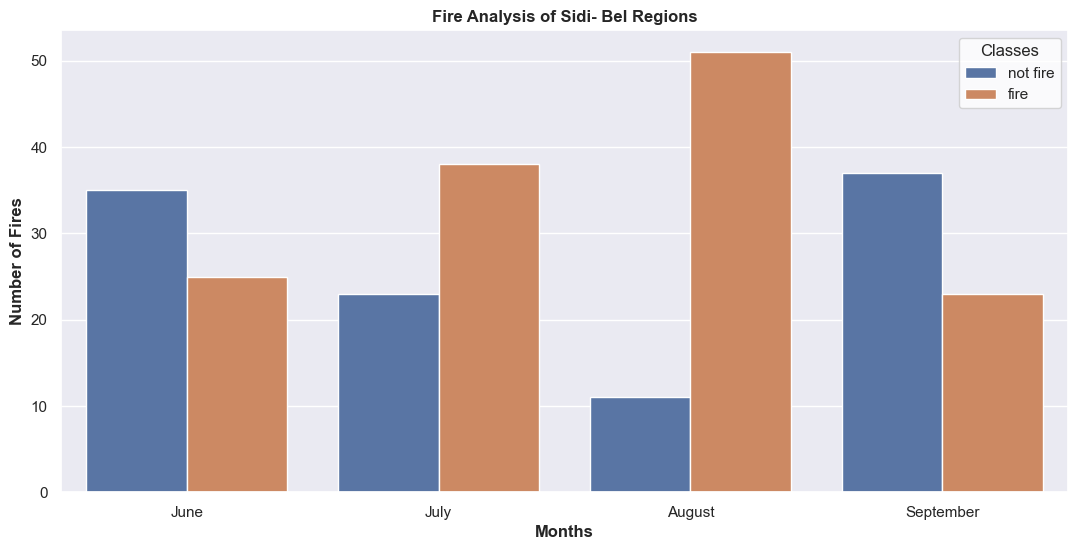

In [37]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

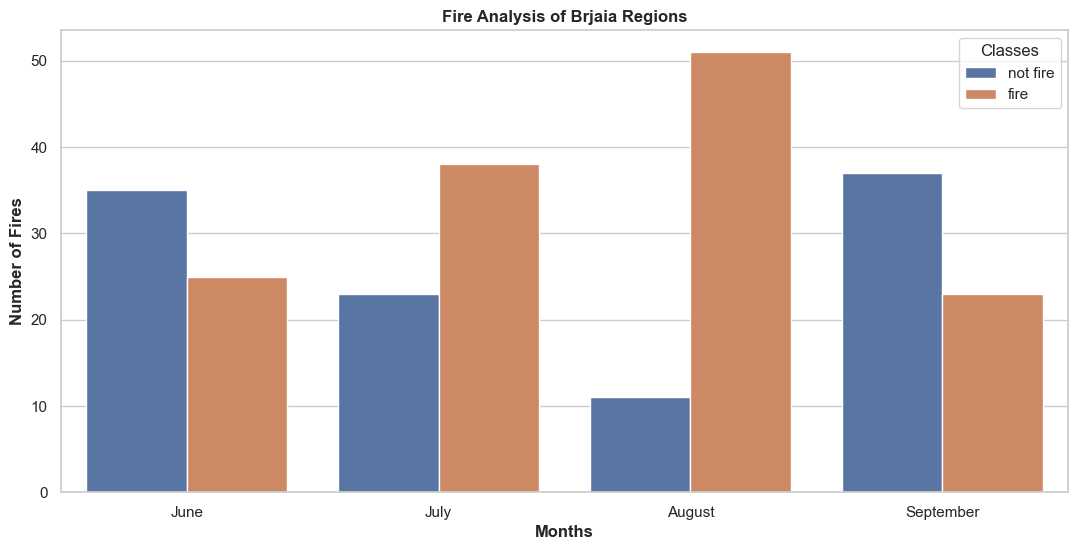

In [38]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

## Results from EDA 

Its observed that July and August had the most forest fires for both regions.

Most of the fires happened in August and and the least in September which is in line with average temperatures during these months.

For the correlations, DMC and DC are highly correlated to BUI. Also DMC, ISI and BUI and highly correlated to FWI - this doesn't matter as much because FWI is our dependent feature. 

There seems to be outliers in many of the independent features but since the dataset is small, we will include them.

# Indicies for Consistency of Split Data Across Models to Prevent Data Leakage

- Since we will be using the same feature data to build two different types of models, we want to make sure that the training and test data for the models are consistent to prevent data leakage 

- To do this, we create the split using the indicies and later use the indicies to separate the data after we define the X and y features for each model

In [39]:
# Change path as needed
df=pd.read_csv('~/Desktop/Data Science/GitHub/Machine-Learning-Projects-End-to-End/Algerian-Forest-Fire-Predictor/dataset/Algerian_forest_fires_cleaned_dataset.csv')

from sklearn.model_selection import train_test_split

indices = np.arange(len(df))
train_idx, test_idx = train_test_split(indices, test_size=0.25, random_state=42)

# Save the indicies as a csv file for later use 
pd.DataFrame({'train_idx': train_idx}).to_csv('train_idx.csv', index=False)
pd.DataFrame({'test_idx': test_idx}).to_csv('test_idx.csv', index=False)